# Streamflow quality control (filtering)

Author: Thiago Nascimento (thiago.nascimento@eawag.ch)

This notebook is part of the EStreams publication and was used to filter the original collated streamflow time-series according to their original flags (when available from providers). The flags are translated as 2=no-flag from providers, 1=validated data, 0=suspect data, NaN=missing value. This approach follows the same framework employed by Chen et al. (2023)  


* Note that this code enables not only the replicability of the current database but also the extrapolation to new catchment areas. 
* Additionally, the user should download and insert the original raw-data in the folder of the same name prior to run this code. 
* The original third-party data used were not made available in this repository due to redistribution and storage-space reasons.  

## Requirements
**Python:**

* Python>=3.6
* Jupyter
* geopandas=0.10.2
* numpy
* os
* pandas=2.1.3
* scipy=1.9.0
* tqdm

Check the Github repository for an environment.yml (for conda environments) or requirements.txt (pip) file.

**Files:**

* data/streamflow/estreams_timeseries_discharge.csv
* data/streamflow/estreams_gauging_stations.csv
* data/shapefiles/estreams_catchments.shp

**Directory:**

* Clone the GitHub directory locally
* Place any third-data variables in their respective directory.
* ONLY update the "PATH" variable in the section "Configurations", with their relative path to the EStreams directory. 


## References
* Chen, X., Jiang, L., Luo, Y., and Liu, J.: A global streamflow indices time series dataset for large-sample hydrological analyses on streamflow regime (until 2022), Earth Syst. Sci. Data, 15, 4463–4479, https://doi.org/10.5194/essd-15-4463-2023, 2023.

# Import modules

In [2]:
import pandas as pd
import numpy as np
import tqdm as tqdm
import os
import warnings

# Configurations

In [3]:
# Only editable variable:
# Relative path to your local directory
PATH = ".."

* #### The users should NOT change anything in the code below here. 

In [4]:
# Non-editable variables:
PATH_OUTPUT = "results/staticattributes/"

# Set the directory:
os.chdir(PATH)

warnings.filterwarnings("ignore")

# Import data

## Daily discharge

In [4]:
timeseries_discharge = pd.read_csv("data/streamflow/estreams_timeseries_streamflow.csv", index_col=0)
timeseries_discharge.index = pd.to_datetime(timeseries_discharge.index)
timeseries_discharge.index.name = "date"
timeseries_discharge

FileNotFoundError: [Errno 2] No such file or directory: 'data/streamflow/estreams_timeseries_streamflow.csv'

## Quality flags

In [6]:
timeseries_discharge_quality_mask = pd.read_csv("data/streamflow/estreams_timeseries_streamflow_quality_mask.csv", index_col=0)
timeseries_discharge_quality_mask.index = pd.to_datetime(timeseries_discharge_quality_mask.index)
timeseries_discharge_quality_mask.index.name = "date"
timeseries_discharge_quality_mask

,AT000001,AT000002,AT000003,AT000004,AT000005,AT000006,AT000007,AT000008,AT000009,AT000010,...,UAGR0012,UAGR0013,UAGR0014,UAGR0015,UAGR0016,UAGR0017,UAGR0018,UAGR0019,UAGR0020,UAGR0021
date,,,,,,,,,,,,,,,,,,,,,
1900-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Streamflow gauges network

In [54]:
network_estreams = pd.read_csv('data/streamflow/estreams_gauging_stations.csv', encoding='utf-8')
network_estreams.set_index("basin_id", inplace = True)
network_estreams["end_date"] = pd.to_datetime(network_estreams["end_date"])
network_estreams["start_date"] = pd.to_datetime(network_estreams["start_date"])
network_estreams

,gauge_id,gauge_name,gauge_country,gauge_provider,river,lon_snap,lat_snap,lon,lat,area,...,area_calc,area_flag,area_perc,start_date,end_date,num_years,num_months,num_days,num_days_gaps,num_continuous_days
basin_id,,,,,,,,,,,,,,,,,,,,,
AT000001,200014,Bangs,AT,AT_EHYD,Rhein,9.534835,47.273748,9.534835,47.273748,4647.9,...,4668.379,0,-0.440608,1996-01-01,2021-12-31,26,312,9497,0.0,9497
AT000002,200048,Schruns (Vonbunweg),AT,AT_EHYD,Litz,9.913677,47.080301,9.913677,47.080301,102.0,...,102.287,0,-0.281373,1958-10-01,2021-12-31,64,759,23103,0.0,23103
AT000003,231662,Loruens-Aeule,AT,AT_EHYD,Ill,9.847765,47.132821,9.847765,47.132821,535.2,...,536.299,0,-0.205344,1985-01-02,2021-12-31,37,444,13513,0.0,13513
AT000004,200592,Kloesterle (OEBB),AT,AT_EHYD,Alfenz,10.061843,47.128994,10.061843,47.128994,66.6,...,66.286,0,0.471471,1998-01-02,2021-12-31,24,288,8765,0.0,8765
AT000005,200097,Buers (Bruecke L82),AT,AT_EHYD,Alvier,9.802668,47.150770,9.802668,47.150770,72.2,...,72.448,0,-0.343490,1990-01-01,2019-12-31,30,360,10957,0.0,10957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UAGR0017,6682300,BASHTANOVKA,UA,UA_GRDC,KACHA,33.894739,44.691884,33.900000,44.683333,321.0,...,325.370,0,-1.361371,1978-01-01,1987-12-31,10,120,3652,0.0,3652
UAGR0018,6682500,YALTA,UA,UA_GRDC,DERE-KIOY,34.166667,44.500000,34.166667,44.500000,49.7,...,47.594,0,4.237425,1978-01-01,1987-12-31,10,120,3652,0.0,3652
UAGR0019,6683010,PIONERSKOE,UA,UA_GRDC,SALHYR,34.199841,44.887685,34.200000,44.883333,261.0,...,244.731,1,6.233333,1978-01-01,1987-12-31,10,120,3652,0.0,3652


In [30]:
network_estreams.columns

Index(['gauge_id', 'gauge_name', 'gauge_country', 'gauge_provider', 'river',
       'lon_snap', 'lat_snap', 'lon', 'lat', 'area', 'elevation', 'area_calc',
       'area_flag', 'area_perc', 'start_date', 'end_date', 'num_years',
       'num_months', 'num_days', 'num_days_gaps', 'num_continuous_days',
       'Suspect_Count', 'Reliable_Count', 'No_Flag_Count', 'Missing_Count',
       'Suspect_Proportion', 'Reliable_Proportion', 'No_Flag_Proportion',
       'Missing_Proportion', 'sum_reliables_noflags', 'num_suspects',
       'num_reliable', 'num_no_flags', 'num_missing', 'frac_suspects',
       'frac_reliable', 'frac_no_flag', 'frac_missing'],
      dtype='object')

# Computation processing

## 1. Masking negative values

In [6]:
# Replace any negative value by np.nan:
timeseries_discharge = timeseries_discharge.applymap(lambda x: np.nan if x < 0 else x)

## 2. Quality flags for gauges
- A (or numeric value 1) = More than 95% of recorded flags are reliable.
- B (or numeric value 2) = More than 95% of recorded flags are reliable or no-flag.
- C (or numeric value 3) = Less than 10% of the record flags are missing.
- D (or numeric value 4) = Less than 20% of the record flags are missing.
- E (or numeric value 5) = At least 20% of the record flags are missing.

In [79]:
# Iterate over columns in time_series_discharge_masks
for column in tqdm.tqdm(timeseries_discharge_quality_mask.columns): 
    
    # Calculate counts for each category
    suspect_count = timeseries_discharge_quality_mask[column].eq(0).sum()
    reliable_count = timeseries_discharge_quality_mask[column].eq(1).sum()
    no_flag_count = timeseries_discharge_quality_mask[column].eq(2).sum()
    
    total_valid_counts = suspect_count + reliable_count + no_flag_count
    
    # Calculate the total number of days between the range
    num_days_range = ((network_estreams.loc[network_estreams.index == column, 'end_date'] - network_estreams.loc[network_estreams.index == column, 'start_date']).dt.days + 1).iloc[0]
    
    # Calculate missing count
    missing_count = max(num_days_range - total_valid_counts, 0)

    # Divide by total number of measurements (taking into account num_days)
    total_measurements = suspect_count + reliable_count + no_flag_count + missing_count
    #total_days = network_estreams.loc[network_estreams.index  == column, 'num_days'].iloc[0]

    # Calculate proportions
    suspect_proportion = suspect_count / total_measurements
    reliable_proportion = reliable_count / total_measurements
    no_flag_proportion = no_flag_count / total_measurements
    missing_proportion = missing_count / total_measurements

    # Store counts or proportions in metadata dataframe
    network_estreams.loc[network_estreams.index == column, 'num_suspects'] = suspect_count
    network_estreams.loc[network_estreams.index  == column, 'num_reliable'] = reliable_count
    network_estreams.loc[network_estreams.index  == column, 'num_no_flags'] = no_flag_count
    network_estreams.loc[network_estreams.index  == column, 'num_missing'] = missing_count

    network_estreams.loc[network_estreams.index  == column, 'frac_suspects'] = suspect_proportion
    network_estreams.loc[network_estreams.index  == column, 'frac_reliable'] = reliable_proportion
    network_estreams.loc[network_estreams.index  == column, 'frac_no_flag'] = no_flag_proportion
    network_estreams.loc[network_estreams.index  == column, 'frac_missing'] = missing_proportion

# Sum the total of reliables and no-flags
network_estreams["sum_reliables_noflags"] = network_estreams["frac_reliable"] + network_estreams["frac_no_flag"] 

# Print or use estreams_network dataframe with counts/proportions added
network_estreams

100%|██████████| 17130/17130 [01:35<00:00, 178.84it/s]


,gauge_id,gauge_name,gauge_country,gauge_provider,river,lon_snap,lat_snap,lon,lat,area,...,num_continuous_days,num_suspects,num_reliable,num_no_flags,num_missing,frac_suspects,frac_reliable,frac_no_flag,frac_missing,sum_reliables_noflags
basin_id,,,,,,,,,,,,,,,,,,,,,
AT000001,200014,Bangs,AT,AT_EHYD,Rhein,9.534835,47.273748,9.534835,47.273748,4647.9,...,9497,0.0,0.0,9497.0,0.0,0.0,0.0,1.0,0.0,1.0
AT000002,200048,Schruns (Vonbunweg),AT,AT_EHYD,Litz,9.913677,47.080301,9.913677,47.080301,102.0,...,23103,0.0,0.0,23103.0,0.0,0.0,0.0,1.0,0.0,1.0
AT000003,231662,Loruens-Aeule,AT,AT_EHYD,Ill,9.847765,47.132821,9.847765,47.132821,535.2,...,13513,0.0,0.0,13513.0,0.0,0.0,0.0,1.0,0.0,1.0
AT000004,200592,Kloesterle (OEBB),AT,AT_EHYD,Alfenz,10.061843,47.128994,10.061843,47.128994,66.6,...,8765,0.0,0.0,8765.0,0.0,0.0,0.0,1.0,0.0,1.0
AT000005,200097,Buers (Bruecke L82),AT,AT_EHYD,Alvier,9.802668,47.150770,9.802668,47.150770,72.2,...,10957,0.0,0.0,10957.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UAGR0017,6682300,BASHTANOVKA,UA,UA_GRDC,KACHA,33.894739,44.691884,33.900000,44.683333,321.0,...,3652,0.0,0.0,3652.0,0.0,0.0,0.0,1.0,0.0,1.0
UAGR0018,6682500,YALTA,UA,UA_GRDC,DERE-KIOY,34.166667,44.500000,34.166667,44.500000,49.7,...,3652,0.0,0.0,3652.0,0.0,0.0,0.0,1.0,0.0,1.0
UAGR0019,6683010,PIONERSKOE,UA,UA_GRDC,SALHYR,34.199841,44.887685,34.200000,44.883333,261.0,...,3652,0.0,0.0,3652.0,0.0,0.0,0.0,1.0,0.0,1.0


In [107]:
# Classify catchments based on the rules
network_estreams['quality_flag'] = 'E'
network_estreams.loc[network_estreams['frac_missing'] < 0.2, 'quality_flag'] = 'D'
network_estreams.loc[network_estreams['frac_missing'] < 0.1, 'quality_flag'] = 'C'
network_estreams.loc[(network_estreams['frac_reliable'] + network_estreams['frac_no_flag']) > 0.95, 'quality_flag'] = 'B'
network_estreams.loc[network_estreams['frac_reliable'] > 0.95, 'quality_flag'] = 'A'

network_estreams[network_estreams.quality_flag == "A"]

,gauge_id,gauge_name,gauge_country,gauge_provider,river,lon_snap,lat_snap,lon,lat,area,...,num_reliable,num_no_flags,num_missing,frac_suspects,frac_reliable,frac_no_flag,frac_missing,sum_reliables_noflags,quality_flag,quality_flag_numeric
basin_id,,,,,,,,,,,,,,,,,,,,,
FR000005,A023020001,A0230201,FR,FR_EAUFRANCE,Le ruisseau l'Augraben à Saint-Louis [Michelfe...,7.556488,47.596980,7.556488,47.596980,NaN,...,216.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,1.000000,A,1
FR000011,A034030201,A0340300,FR,FR_EAUFRANCE,Le canal d'irrigation de la Hardt à Hombourg,7.480875,47.758724,7.480875,47.758724,NaN,...,451.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,1.000000,A,1
FR000019,A052055001,A0530310,FR,FR_EAUFRANCE,Le ruisseau Istergraben à Friesenheim,7.677066,48.310351,7.677066,48.310351,NaN,...,436.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,1.000000,A,1
FR000021,A053074001,A0530750,FR,FR_EAUFRANCE,Le ruisseau la Weil à Obenheim,7.686697,48.368418,7.686697,48.368418,46.00,...,5297.0,0.0,68.0,0.004084,0.983293,0.0,0.012623,0.983293,A,1
FR000031,A112062201,A1126210,FR,FR_EAUFRANCE,Le canal du Rhône au Rhin à Valdieu-Lutran,7.057049,47.630391,7.057049,47.630391,NaN,...,5983.0,0.0,20.0,0.017191,0.979535,0.0,0.003274,0.979535,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PT000255,24H/01H,SÃO DOMINGOS (ALGALÉ),PT,PT_SNIRH,RIBEIRA DE ALGALÉ,-8.316000,38.296000,-8.316000,38.296000,61.79,...,9749.0,0.0,24.0,0.000000,0.997544,0.0,0.002456,0.997544,A,1
PT000264,24H/02H,VALE DA URSA,PT,PT_SNIRH,RIBEIRA DA URSA,-8.291000,38.306000,-8.291000,38.306000,76.35,...,12372.0,0.0,88.0,0.000000,0.992937,0.0,0.007063,0.992937,A,1
PT000265,03K/01H,VALE GIESTOSO (R.E.),PT,PT_SNIRH,RIO BEÇA,-7.710000,41.710000,-7.710000,41.710000,77.72,...,19723.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,1.000000,A,1


In [121]:
# Classify catchments based on the rules (here the order matter since one gaueg can have multiple classifications)
network_estreams['quality_flag'] = 'E'
network_estreams.loc[network_estreams['frac_missing'] < 0.2, 'quality_flag'] = 'D'
network_estreams.loc[network_estreams['frac_missing'] < 0.1, 'quality_flag'] = 'C'
network_estreams.loc[(network_estreams['frac_reliable'] + network_estreams['frac_no_flag']) > 0.95, 'quality_flag'] = 'B'
network_estreams.loc[network_estreams['frac_reliable'] > 0.95, 'quality_flag'] = 'A'

## Convert flag labels to numeric values
#flag_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5}
#network_estreams['quality_flag_numeric'] = network_estreams['quality_flag'].map(flag_mapping)

In [162]:
# Sum the counts of each category
count_sum = network_estreams[["num_reliable", "num_suspects", "num_missing", "num_no_flags"]].sum()
count_sum


num_reliable     44066656.0
num_suspects      3819104.0
num_missing      16779209.0
num_no_flags    145969209.0
dtype: float64

In [163]:
count_sum = count_sum/count_sum.sum()

count_sum

num_reliable    0.209209
num_suspects    0.018131
num_missing     0.079660
num_no_flags    0.692999
dtype: float64

In [ ]:
69.3+

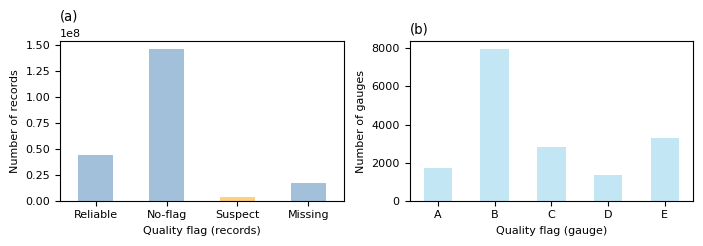

In [164]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 8})  # Change the 12 to your desired font size

# Assuming you have a DataFrame called 'catchment_data' containing the classification results
# and another DataFrame called 'network_estreams' containing the count information

# Count the occurrences of each classification
classification_counts = network_estreams['quality_flag'].value_counts()

# Define the order of classifications for plotting
classification_order = ['A', 'B', 'C', 'D', 'E']

# Sum the counts of each category
count_sum = network_estreams[["num_reliable", "num_no_flags", "num_suspects", "num_missing"]].sum()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(7, 2.5))


# Plot the sum of measurement counts in subplot 2
count_sum.plot(kind='bar', color=['steelblue', 'steelblue', 'orange', 'steelblue'], ax=axes[0], alpha=0.5)
axes[0].set_title('(a)', loc="left")
axes[0].set_xlabel('Quality flag (records)')
axes[0].set_ylabel('Number of records')
axes[0].tick_params(axis='x', rotation=0)
axes[0].set_xticklabels(['Reliable', 'No-flag', 'Suspect', 'Missing'])

# Plot the classification counts in subplot 1
classification_counts.loc[classification_order].plot(kind='bar', color='skyblue', ax=axes[1], alpha=0.5)
axes[1].set_title('(b)', loc="left")
axes[1].set_xlabel('Quality flag (gauge)')
axes[1].set_ylabel('Number of gauges')
axes[1].tick_params(axis='x', rotation=0)

# Adjust layout
plt.tight_layout()

fig.savefig('results/fig_quality.png', dpi=300,  bbox_inches='tight')

# Show the plot
plt.show()




In [171]:

network_estreams[network_estreams.index.str.contains('ITLC') | network_estreams.index.str.contains('ITLW') | network_estreams.index.str.contains('PT')
                 | network_estreams.index.str.contains('FR')| network_estreams.index.str.contains('ITIS') | network_estreams.index.str.contains('IE')
                 | network_estreams.index.str.contains('ITLI')| network_estreams.index.str.contains('ITTO')]


,gauge_id,gauge_name,gauge_country,gauge_provider,river,lon_snap,lat_snap,lon,lat,area,...,num_reliable,num_no_flags,num_missing,frac_suspects,frac_reliable,frac_no_flag,frac_missing,sum_reliables_noflags,quality_flag,quality_flag_numeric
basin_id,,,,,,,,,,,,,,,,,,,,,
FR000001,A021005050,A0210050,FR,FR_EAUFRANCE,Le Rhin en Suisse [Bâle [Rheinhalle]],7.606153,47.556970,7.606153,47.556970,35878.00,...,0.0,3586.0,10.0,0.000000,0.000000,0.997219,0.002781,0.997219,B,2
FR000002,A022020001,A0220200,FR,FR_EAUFRANCE,L'Augraben à Hégenheim,7.528982,47.564377,7.528982,47.564377,15.00,...,647.0,0.0,298.0,0.915663,0.057742,0.000000,0.026595,0.057742,C,3
FR000003,A022065001,A0220650,FR,FR_EAUFRANCE,Le ruisseau le Liesbach à Blotzheim,7.508168,47.587489,7.508168,47.587489,8.20,...,530.0,0.0,0.0,0.380841,0.619159,0.000000,0.000000,0.619159,C,3
FR000004,A023010001,A0220570,FR,FR_EAUFRANCE,[Le Liesbach] à Saint-Louis [Langenhaeuser],7.545294,47.603575,7.545294,47.603575,NaN,...,169.0,0.0,327.0,0.311111,0.234722,0.000000,0.454167,0.234722,E,5
FR000005,A023020001,A0230201,FR,FR_EAUFRANCE,Le ruisseau l'Augraben à Saint-Louis [Michelfe...,7.556488,47.596980,7.556488,47.596980,NaN,...,216.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PT000276,08L/02H,VILAR,PT,PT_SNIRH,RIO TÁVORA,-7.534000,40.989000,-7.534000,40.989000,358.35,...,2127.0,0.0,3.0,0.000000,0.998592,0.000000,0.001408,0.998592,A,1
PT000277,03P/01H,VINHAIS QUINTA RANCA (R.E.),PT,PT_SNIRH,RIO TUELA,-6.995000,41.810000,-6.995000,41.810000,478.54,...,16801.0,0.0,3287.0,0.000000,0.836370,0.000000,0.163630,0.836370,D,4
PT000278,31K/06HA,VÁRZEAS,PT,PT_SNIRH,BARRANCO DO MONTE DOS LAGARTOS,-7.796518,37.153177,-7.796518,37.153177,NaN,...,1646.0,90.0,366.0,0.000000,0.783064,0.042816,0.174120,0.825880,D,4


In [173]:
6140/17130

0.35843549328663166

In [122]:
network_estreams["quality_flag"].value_counts()

quality_flag
B    7963
E    3318
C    2800
A    1715
D    1334
Name: count, dtype: int64

In [124]:
(7963+1715)/17130

0.5649737302977232

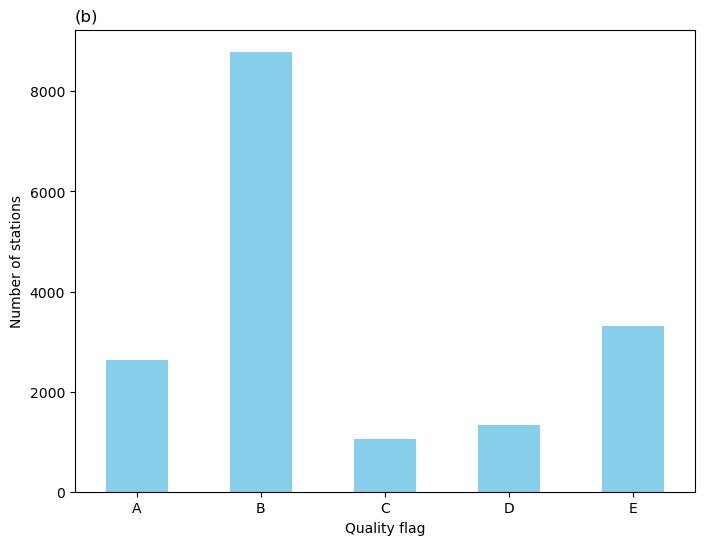

In [120]:
import matplotlib.pyplot as plt

# Count the occurrences of each classification
classification_counts = network_estreams['quality_flag'].value_counts()

# Define the order of classifications for plotting
classification_order = ['A', 'B', 'C', 'D', 'E']

# Create a bar plot
plt.figure(figsize=(8, 6))
classification_counts.loc[classification_order].plot(kind='bar', color='skyblue')
plt.title('(b)', loc="left")
plt.xlabel('Quality flag')
plt.ylabel('Number of stations')
plt.xticks(rotation=0)
plt.show()

In [99]:
network_estreams.loc[(network_estreams['frac_reliable'] + network_estreams['frac_no_flag']) > 0.95]

,gauge_id,gauge_name,gauge_country,gauge_provider,river,lon_snap,lat_snap,lon,lat,area,...,num_reliable,num_no_flags,num_missing,frac_suspects,frac_reliable,frac_no_flag,frac_missing,sum_reliables_noflags,quality_flag,quality_flag_numeric
basin_id,,,,,,,,,,,,,,,,,,,,,
AT000001,200014,Bangs,AT,AT_EHYD,Rhein,9.534835,47.273748,9.534835,47.273748,4647.9,...,0.0,9497.0,0.0,0.0,0.0,1.0,0.0,1.0,B,2
AT000002,200048,Schruns (Vonbunweg),AT,AT_EHYD,Litz,9.913677,47.080301,9.913677,47.080301,102.0,...,0.0,23103.0,0.0,0.0,0.0,1.0,0.0,1.0,B,2
AT000003,231662,Loruens-Aeule,AT,AT_EHYD,Ill,9.847765,47.132821,9.847765,47.132821,535.2,...,0.0,13513.0,0.0,0.0,0.0,1.0,0.0,1.0,B,2
AT000004,200592,Kloesterle (OEBB),AT,AT_EHYD,Alfenz,10.061843,47.128994,10.061843,47.128994,66.6,...,0.0,8765.0,0.0,0.0,0.0,1.0,0.0,1.0,B,2
AT000005,200097,Buers (Bruecke L82),AT,AT_EHYD,Alvier,9.802668,47.150770,9.802668,47.150770,72.2,...,0.0,10957.0,0.0,0.0,0.0,1.0,0.0,1.0,B,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UAGR0017,6682300,BASHTANOVKA,UA,UA_GRDC,KACHA,33.894739,44.691884,33.900000,44.683333,321.0,...,0.0,3652.0,0.0,0.0,0.0,1.0,0.0,1.0,B,2
UAGR0018,6682500,YALTA,UA,UA_GRDC,DERE-KIOY,34.166667,44.500000,34.166667,44.500000,49.7,...,0.0,3652.0,0.0,0.0,0.0,1.0,0.0,1.0,B,2
UAGR0019,6683010,PIONERSKOE,UA,UA_GRDC,SALHYR,34.199841,44.887685,34.200000,44.883333,261.0,...,0.0,3652.0,0.0,0.0,0.0,1.0,0.0,1.0,B,2


In [103]:
network_estreams[network_estreams.quality_flag == "B"]

,gauge_id,gauge_name,gauge_country,gauge_provider,river,lon_snap,lat_snap,lon,lat,area,...,num_reliable,num_no_flags,num_missing,frac_suspects,frac_reliable,frac_no_flag,frac_missing,sum_reliables_noflags,quality_flag,quality_flag_numeric
basin_id,,,,,,,,,,,,,,,,,,,,,
AT000001,200014,Bangs,AT,AT_EHYD,Rhein,9.534835,47.273748,9.534835,47.273748,4647.9,...,0.0,9497.0,0.0,0.0,0.0,1.0,0.0,1.0,B,2
AT000002,200048,Schruns (Vonbunweg),AT,AT_EHYD,Litz,9.913677,47.080301,9.913677,47.080301,102.0,...,0.0,23103.0,0.0,0.0,0.0,1.0,0.0,1.0,B,2
AT000003,231662,Loruens-Aeule,AT,AT_EHYD,Ill,9.847765,47.132821,9.847765,47.132821,535.2,...,0.0,13513.0,0.0,0.0,0.0,1.0,0.0,1.0,B,2
AT000004,200592,Kloesterle (OEBB),AT,AT_EHYD,Alfenz,10.061843,47.128994,10.061843,47.128994,66.6,...,0.0,8765.0,0.0,0.0,0.0,1.0,0.0,1.0,B,2
AT000005,200097,Buers (Bruecke L82),AT,AT_EHYD,Alvier,9.802668,47.150770,9.802668,47.150770,72.2,...,0.0,10957.0,0.0,0.0,0.0,1.0,0.0,1.0,B,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UAGR0017,6682300,BASHTANOVKA,UA,UA_GRDC,KACHA,33.894739,44.691884,33.900000,44.683333,321.0,...,0.0,3652.0,0.0,0.0,0.0,1.0,0.0,1.0,B,2
UAGR0018,6682500,YALTA,UA,UA_GRDC,DERE-KIOY,34.166667,44.500000,34.166667,44.500000,49.7,...,0.0,3652.0,0.0,0.0,0.0,1.0,0.0,1.0,B,2
UAGR0019,6683010,PIONERSKOE,UA,UA_GRDC,SALHYR,34.199841,44.887685,34.200000,44.883333,261.0,...,0.0,3652.0,0.0,0.0,0.0,1.0,0.0,1.0,B,2


In [ ]:
# Convert flag labels to numeric values
flag_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5}
network_estreams['quality_flag_numeric'] = network_estreams['quality_flag'].map(flag_mapping)

# Find the lowest numeric value for each catchment
network_estreams = network_estreams.groupby(network_estreams.index).agg({'quality_flag_numeric': 'min'}).reset_index()


In [101]:
network_estreams[network_estreams.frac_reliable>=0.95]

,gauge_id,gauge_name,gauge_country,gauge_provider,river,lon_snap,lat_snap,lon,lat,area,...,num_reliable,num_no_flags,num_missing,frac_suspects,frac_reliable,frac_no_flag,frac_missing,sum_reliables_noflags,quality_flag,quality_flag_numeric
basin_id,,,,,,,,,,,,,,,,,,,,,
FR000005,A023020001,A0230201,FR,FR_EAUFRANCE,Le ruisseau l'Augraben à Saint-Louis [Michelfe...,7.556488,47.596980,7.556488,47.596980,NaN,...,216.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,1.000000,A,1
FR000011,A034030201,A0340300,FR,FR_EAUFRANCE,Le canal d'irrigation de la Hardt à Hombourg,7.480875,47.758724,7.480875,47.758724,NaN,...,451.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,1.000000,A,1
FR000019,A052055001,A0530310,FR,FR_EAUFRANCE,Le ruisseau Istergraben à Friesenheim,7.677066,48.310351,7.677066,48.310351,NaN,...,436.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,1.000000,A,1
FR000021,A053074001,A0530750,FR,FR_EAUFRANCE,Le ruisseau la Weil à Obenheim,7.686697,48.368418,7.686697,48.368418,46.00,...,5297.0,0.0,68.0,0.004084,0.983293,0.0,0.012623,0.983293,A,1
FR000031,A112062201,A1126210,FR,FR_EAUFRANCE,Le canal du Rhône au Rhin à Valdieu-Lutran,7.057049,47.630391,7.057049,47.630391,NaN,...,5983.0,0.0,20.0,0.017191,0.979535,0.0,0.003274,0.979535,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PT000255,24H/01H,SÃO DOMINGOS (ALGALÉ),PT,PT_SNIRH,RIBEIRA DE ALGALÉ,-8.316000,38.296000,-8.316000,38.296000,61.79,...,9749.0,0.0,24.0,0.000000,0.997544,0.0,0.002456,0.997544,A,1
PT000264,24H/02H,VALE DA URSA,PT,PT_SNIRH,RIBEIRA DA URSA,-8.291000,38.306000,-8.291000,38.306000,76.35,...,12372.0,0.0,88.0,0.000000,0.992937,0.0,0.007063,0.992937,A,1
PT000265,03K/01H,VALE GIESTOSO (R.E.),PT,PT_SNIRH,RIO BEÇA,-7.710000,41.710000,-7.710000,41.710000,77.72,...,19723.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,1.000000,A,1


In [98]:
network_estreams[network_estreams.sum_reliables_noflags>=0.95]

,gauge_id,gauge_name,gauge_country,gauge_provider,river,lon_snap,lat_snap,lon,lat,area,...,num_reliable,num_no_flags,num_missing,frac_suspects,frac_reliable,frac_no_flag,frac_missing,sum_reliables_noflags,quality_flag,quality_flag_numeric
basin_id,,,,,,,,,,,,,,,,,,,,,
AT000001,200014,Bangs,AT,AT_EHYD,Rhein,9.534835,47.273748,9.534835,47.273748,4647.9,...,0.0,9497.0,0.0,0.0,0.0,1.0,0.0,1.0,B,2
AT000002,200048,Schruns (Vonbunweg),AT,AT_EHYD,Litz,9.913677,47.080301,9.913677,47.080301,102.0,...,0.0,23103.0,0.0,0.0,0.0,1.0,0.0,1.0,B,2
AT000003,231662,Loruens-Aeule,AT,AT_EHYD,Ill,9.847765,47.132821,9.847765,47.132821,535.2,...,0.0,13513.0,0.0,0.0,0.0,1.0,0.0,1.0,B,2
AT000004,200592,Kloesterle (OEBB),AT,AT_EHYD,Alfenz,10.061843,47.128994,10.061843,47.128994,66.6,...,0.0,8765.0,0.0,0.0,0.0,1.0,0.0,1.0,B,2
AT000005,200097,Buers (Bruecke L82),AT,AT_EHYD,Alvier,9.802668,47.150770,9.802668,47.150770,72.2,...,0.0,10957.0,0.0,0.0,0.0,1.0,0.0,1.0,B,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UAGR0017,6682300,BASHTANOVKA,UA,UA_GRDC,KACHA,33.894739,44.691884,33.900000,44.683333,321.0,...,0.0,3652.0,0.0,0.0,0.0,1.0,0.0,1.0,B,2
UAGR0018,6682500,YALTA,UA,UA_GRDC,DERE-KIOY,34.166667,44.500000,34.166667,44.500000,49.7,...,0.0,3652.0,0.0,0.0,0.0,1.0,0.0,1.0,B,2
UAGR0019,6683010,PIONERSKOE,UA,UA_GRDC,SALHYR,34.199841,44.887685,34.200000,44.883333,261.0,...,0.0,3652.0,0.0,0.0,0.0,1.0,0.0,1.0,B,2


<Axes: xlabel='basin_id'>

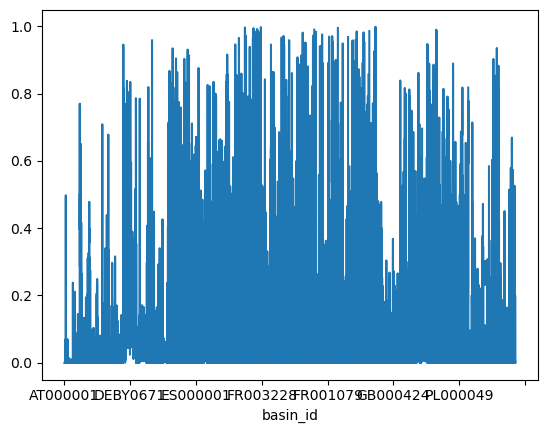

In [82]:
network_estreams.frac_missing.plot()

In [86]:
network_estreams[network_estreams.frac_missing<=0.1]

,gauge_id,gauge_name,gauge_country,gauge_provider,river,lon_snap,lat_snap,lon,lat,area,...,num_continuous_days,num_suspects,num_reliable,num_no_flags,num_missing,frac_suspects,frac_reliable,frac_no_flag,frac_missing,sum_reliables_noflags
basin_id,,,,,,,,,,,,,,,,,,,,,
AT000001,200014,Bangs,AT,AT_EHYD,Rhein,9.534835,47.273748,9.534835,47.273748,4647.9,...,9497,0.0,0.0,9497.0,0.0,0.0,0.0,1.0,0.0,1.0
AT000002,200048,Schruns (Vonbunweg),AT,AT_EHYD,Litz,9.913677,47.080301,9.913677,47.080301,102.0,...,23103,0.0,0.0,23103.0,0.0,0.0,0.0,1.0,0.0,1.0
AT000003,231662,Loruens-Aeule,AT,AT_EHYD,Ill,9.847765,47.132821,9.847765,47.132821,535.2,...,13513,0.0,0.0,13513.0,0.0,0.0,0.0,1.0,0.0,1.0
AT000004,200592,Kloesterle (OEBB),AT,AT_EHYD,Alfenz,10.061843,47.128994,10.061843,47.128994,66.6,...,8765,0.0,0.0,8765.0,0.0,0.0,0.0,1.0,0.0,1.0
AT000005,200097,Buers (Bruecke L82),AT,AT_EHYD,Alvier,9.802668,47.150770,9.802668,47.150770,72.2,...,10957,0.0,0.0,10957.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UAGR0017,6682300,BASHTANOVKA,UA,UA_GRDC,KACHA,33.894739,44.691884,33.900000,44.683333,321.0,...,3652,0.0,0.0,3652.0,0.0,0.0,0.0,1.0,0.0,1.0
UAGR0018,6682500,YALTA,UA,UA_GRDC,DERE-KIOY,34.166667,44.500000,34.166667,44.500000,49.7,...,3652,0.0,0.0,3652.0,0.0,0.0,0.0,1.0,0.0,1.0
UAGR0019,6683010,PIONERSKOE,UA,UA_GRDC,SALHYR,34.199841,44.887685,34.200000,44.883333,261.0,...,3652,0.0,0.0,3652.0,0.0,0.0,0.0,1.0,0.0,1.0


In [87]:
network_estreams[network_estreams.frac_missing<=0.2]

,gauge_id,gauge_name,gauge_country,gauge_provider,river,lon_snap,lat_snap,lon,lat,area,...,num_continuous_days,num_suspects,num_reliable,num_no_flags,num_missing,frac_suspects,frac_reliable,frac_no_flag,frac_missing,sum_reliables_noflags
basin_id,,,,,,,,,,,,,,,,,,,,,
AT000001,200014,Bangs,AT,AT_EHYD,Rhein,9.534835,47.273748,9.534835,47.273748,4647.9,...,9497,0.0,0.0,9497.0,0.0,0.0,0.0,1.0,0.0,1.0
AT000002,200048,Schruns (Vonbunweg),AT,AT_EHYD,Litz,9.913677,47.080301,9.913677,47.080301,102.0,...,23103,0.0,0.0,23103.0,0.0,0.0,0.0,1.0,0.0,1.0
AT000003,231662,Loruens-Aeule,AT,AT_EHYD,Ill,9.847765,47.132821,9.847765,47.132821,535.2,...,13513,0.0,0.0,13513.0,0.0,0.0,0.0,1.0,0.0,1.0
AT000004,200592,Kloesterle (OEBB),AT,AT_EHYD,Alfenz,10.061843,47.128994,10.061843,47.128994,66.6,...,8765,0.0,0.0,8765.0,0.0,0.0,0.0,1.0,0.0,1.0
AT000005,200097,Buers (Bruecke L82),AT,AT_EHYD,Alvier,9.802668,47.150770,9.802668,47.150770,72.2,...,10957,0.0,0.0,10957.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UAGR0017,6682300,BASHTANOVKA,UA,UA_GRDC,KACHA,33.894739,44.691884,33.900000,44.683333,321.0,...,3652,0.0,0.0,3652.0,0.0,0.0,0.0,1.0,0.0,1.0
UAGR0018,6682500,YALTA,UA,UA_GRDC,DERE-KIOY,34.166667,44.500000,34.166667,44.500000,49.7,...,3652,0.0,0.0,3652.0,0.0,0.0,0.0,1.0,0.0,1.0
UAGR0019,6683010,PIONERSKOE,UA,UA_GRDC,SALHYR,34.199841,44.887685,34.200000,44.883333,261.0,...,3652,0.0,0.0,3652.0,0.0,0.0,0.0,1.0,0.0,1.0


In [88]:
network_estreams[network_estreams.frac_missing>0.2]

,gauge_id,gauge_name,gauge_country,gauge_provider,river,lon_snap,lat_snap,lon,lat,area,...,num_continuous_days,num_suspects,num_reliable,num_no_flags,num_missing,frac_suspects,frac_reliable,frac_no_flag,frac_missing,sum_reliables_noflags
basin_id,,,,,,,,,,,,,,,,,,,,,
AT000055,202689,Vernagt,AT,AT_EHYD,Vernagtbach,10.828714,46.856707,10.828714,46.856707,11.4,...,537,0.0,0.0,8346.0,8270.0,0.0,0.0,0.502287,0.497713,0.502287
AT000326,207894,Lilienfeld-Marktl,AT,AT_EHYD,Traisen,15.604328,48.026249,15.604328,48.026249,345.2,...,16802,0.0,0.0,17533.0,5478.0,0.0,0.0,0.761940,0.238060,0.761940
AT000401,208736,Stixenstein (Schloss),AT,AT_EHYD,Sierning,15.979481,47.744028,15.979481,47.744028,89.7,...,16802,0.0,0.0,20455.0,5478.0,0.0,0.0,0.788763,0.211237,0.788763
BA000001,Martin Brod,Martin Brod,BA,BA_FHMZ,Una,16.134722,44.495556,16.134722,44.495556,1459.0,...,4879,0.0,0.0,7348.0,4705.0,0.0,0.0,0.609641,0.390359,0.609641
BA000002,Kljuc,Klju?,BA,BA_FHMZ,Sana,16.796389,44.525000,16.796389,44.525000,754.0,...,5635,0.0,0.0,7096.0,4957.0,0.0,0.0,0.588733,0.411267,0.588733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRGR0020,6691650,YAKAPINAR (MISIS),TR,TR_GRDC,CEYHAN NEHRI,35.604643,36.944143,35.600000,36.950000,20466.0,...,1461,0.0,0.0,2557.0,1461.0,0.0,0.0,0.636386,0.363614,0.636386
TRGR0023,6692100,DEMIRKOEPRUE,TR,TR_GRDC,ORONTES RIVER,36.299323,36.270825,36.300000,36.283333,16170.0,...,1144,0.0,0.0,2554.0,1464.0,0.0,0.0,0.635640,0.364360,0.635640
TRGR0025,6695250,BAGISTAS,TR,TR_GRDC,EUPHRATES RIVER,38.483333,39.450000,38.483333,39.450000,15562.0,...,1461,0.0,0.0,2557.0,1461.0,0.0,0.0,0.636386,0.363614,0.636386


In [ ]:
# Output the rows where the condition is met for each column
for column, ranges in rows_with_consecutive_values.items():
    print(f"Column '{column}' has the following ranges with more than {threshold} consecutive identical values (>= {min_value}):")
    for start, end in ranges:
        print(f"  - Rows {start} to {end - 1}")

In [ ]:
# Replace values in DataFrame based on the ranges in rows_with_consecutive_values
for column, ranges in rows_with_consecutive_values.items():
    for start, end in ranges:
        # Replace values in the specified range with np.nan
        df.loc[start:end - 1, column] = np.nan

# Output the modified DataFrame
print(df)

In [ ]:
import pandas as pd
import tqdm as tqdm

def check_for_potential_outliers(df, log_mean_df, log_std_df, threshould_std = 10):
    """
    Checks each specified original column in the DataFrame (df) to see if values are greater than 5 times the corresponding mean column
    in the mean_df DataFrame (grouped by day of the year).
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the time series data. Assumes DateTimeIndex.
    mean_df (pd.DataFrame): The DataFrame containing mean values grouped by the day of the year.
    
    Returns:
    dict: A dictionary where keys are column names and values are DataFrames (from df) with rows where the condition is met.
    """
    # Initialize an empty dictionary to store results
    results = {}
    
    mean_df_above = log_mean_df + threshould_std*(log_std_df)
    mean_df_below = log_mean_df - threshould_std*(log_std_df)

    # Convert mean_df index to 'day_of_year' to match the time series DataFrame
    mean_df_above['day_of_year'] = mean_df_above.index
    mean_df_below['day_of_year'] = mean_df_below.index
    
    # Iterate through each column in df
    for column in tqdm.tqdm(df.columns):
        # Check if the column also exists in mean_df
        if column not in mean_df_above.columns:
            continue
        
        df_col = pd.DataFrame(df[column])
        
        
        # Calculate the day of the year for each index in df
        df['day_of_year'] = df.index.dayofyear
        df["date"] = df.index
        
        # Merge df with mean_df on the 'day_of_year' column
        merged_df = df.merge(mean_df_above, on='day_of_year', suffixes=('', '_mean'))
        merged_below_df = df.merge(mean_df_below, on='day_of_year', suffixes=('', '_mean'))

        # Use the sort_values() method to sort the merged DataFrame
        merged_df = merged_df.sort_values(by="date")
        merged_below_df = merged_below_df.sort_values(by="date")
        
        # Drop the "date" column
        merged_df.drop("date", axis=1, inplace=True)
        merged_below_df.drop("date", axis=1, inplace=True)
        
        # Reset the index
        merged_df.reset_index(drop=True, inplace=True)
        merged_below_df.reset_index(drop=True, inplace=True)
        
        # Apply the condition: value in df > 5 times the mean from mean_df
        mask1 = merged_df[column] > 1 * merged_df[f"{column}_mean"]
        mask2 = merged_below_df[column] < 1 * merged_below_df[f"{column}_mean"]
        
        # Combine the two masks using a logical AND (&) operator
        combined_mask = mask1 | mask2
    
        # Filter the DataFrame based on the mask
        filtered_df = merged_df[combined_mask][[column]]
        
        # Store the filtered DataFrame in the results dictionary
        results[column] = filtered_df
        
        # Remove 'day_of_year' columns from merged_df to avoid modifying the original df
        merged_df.drop(columns=['day_of_year'], inplace=True)
        
    return results


## Filtering the data

In [ ]:
# Here we can filter only the gauges with non "999" or "888" values:
network_estreams_filtered = network_estreams[network_estreams.area_flag < 888.0]
network_estreams_filtered

In [ ]:
# Here we can filter only the gauges at least 1 year of consecutive measured days:
network_estreams_filtered = network_estreams_filtered[network_estreams_filtered.num_continuous_days >= 365]
network_estreams_filtered

## Preprocessing

### Filter the time series
* At this part we can filter the hydro-climatic time series to the filtered gauges.

In [ ]:
# Specific discharge
timeseries_discharge = timeseries_discharge.loc[:, network_estreams_filtered.index]

# Precipitation
timeseries_precipitation = timeseries_precipitation.loc[:, network_estreams_filtered.index]

# Temperature
timeseries_temperature = timeseries_temperature.loc[:, network_estreams_filtered.index]

# Potential evapotranspiration
timeseries_pet = timeseries_pet.loc[:, network_estreams_filtered.index]

### Subset the streamflow time series
* Here we subset the streamflow time series to the same time-period of the meteorology 

In [ ]:
timeseries_discharge = timeseries_discharge.loc[timeseries_precipitation.index,:]

### Compute quality masks
* We need to compute a mask which will assin "1" to NaNs and "0" to good quality data

In [ ]:
# Quality-mask for joint specific discharge and precipitation (Hydrological signatures):  
quality_discharge_precipitation = (pd.isna(timeseries_discharge) | pd.isna(timeseries_precipitation)).astype(int)

# Quality-mask for joint precipitation, pet and temperature (Climatic signatures):
quality_pet_precipitation_temperature = (pd.isna(timeseries_precipitation) | pd.isna(timeseries_pet) | pd.isna(timeseries_temperature)).astype(int)

### Calculate the hydrological years

In [ ]:
hydro_year = calculate_hydro_year(date=timeseries_discharge.index, first_month=10)
hydro_year

## Signatures computation

In [ ]:
hydrometeo_signatures_df = pd.DataFrame(index = network_estreams_filtered.index, 
                                        columns = ["q_corr", "q_mean", "q_runoff_ratio", "q_elas_Sawicz", 
                                                   "q_elas_Sankarasubramanian", "slope_sawicz", "slope_yadav",
                                                   "slope_mcmillan", "slope_addor", "baseflow_index", "hfd_mean",
                                                   "hfd_std", "q_5", "q_95", "hq_freq", "hq_dur", "lq_freq", 
                                                   "lq_dur", "zero_q_freq", "p_mean", "pet_mean", "aridity", 
                                                   "p_seasonality", "frac_snow", "hp_freq",
                                                   "hp_dur", "hp_time", "lp_freq", "lp_dur",
                                                   "lp_time"
                                                  ])

In [ ]:
# Streamflow signatures
for gauge in tqdm.tqdm(timeseries_discharge.columns):
        
    # Correlation between runoff and precipitation
    hydrometeo_signatures_df.loc[gauge, "q_corr"] = timeseries_discharge.loc[:, gauge].corr(timeseries_precipitation.loc[:, gauge])
    
    # Runoff mean (mm/day)
    hydrometeo_signatures_df.loc[gauge, "q_mean"] = hydroanalysis.streamflow_signatures.calculate_q_mean(timeseries_discharge.loc[:, gauge].values, quality_discharge_precipitation.loc[:, gauge].values)
    
    # Runoff ratio (-)
    hydrometeo_signatures_df.loc[gauge, "q_runoff_ratio"] = hydroanalysis.streamflow_signatures.calculate_runoff_ratio(streamflow = timeseries_discharge.loc[:, gauge].values,
                                                                                              quality  = quality_discharge_precipitation.loc[:, gauge].values,
                                                                                            precipitation = timeseries_precipitation.loc[:, gauge].values)
    # Streamflow elasticity (-)
    elas_gauge = hydroanalysis.streamflow_signatures.calculate_stream_elas(streamflow = timeseries_discharge.loc[:, gauge].values,
                                                                quality  = quality_discharge_precipitation.loc[:, gauge].values,
                                                                precipitation = timeseries_precipitation.loc[:, gauge].values,
                                                                hydro_year  = hydro_year)
    try:
        hydrometeo_signatures_df.loc[gauge, ["q_elas_Sawicz", 
                                         "q_elas_Sankarasubramanian"]] = elas_gauge["Sawicz"],elas_gauge["Sankarasubramanian"]
    except: 
        hydrometeo_signatures_df.loc[gauge, ["q_elas_Sawicz", 
                                         "q_elas_Sankarasubramanian"]] = np.nan, np.nan
    
    # Slope (-)
    slope_gauge = hydroanalysis.streamflow_signatures.calculate_slope_fdc(streamflow = timeseries_discharge.loc[:, gauge].values,                                                                  
                                                                          quality  = quality_discharge_precipitation.loc[:, gauge].values)
    try:
        hydrometeo_signatures_df.loc[gauge, ["slope_sawicz", "slope_yadav",
                                         "slope_mcmillan", "slope_addor"]] = slope_gauge["Sawicz"],slope_gauge["Yadav"],slope_gauge["McMillan"],slope_gauge["Addor"]
    except: 
        hydrometeo_signatures_df.loc[gauge, ["slope_sawicz", "slope_yadav",
                                         "slope_mcmillan", "slope_addor"]] = np.nan, np.nan, np.nan, np.nan
    # Baseflow index (-)
    hydrometeo_signatures_df.loc[gauge, "baseflow_index"] = hydroanalysis.streamflow_signatures.calculate_baseflow_index(streamflow = timeseries_discharge.loc[:, gauge].values, 
                                                                                                quality = quality_discharge_precipitation.loc[:, gauge].values)
    
    # Half-flow duration (days)
    hfd_gauge = hydroanalysis.streamflow_signatures.calculate_hfd_mean(streamflow = timeseries_discharge.loc[:, gauge].values,
                                                                quality  = quality_discharge_precipitation.loc[:, gauge].values,
                                                                hydro_year = hydro_year)
    try:
        hydrometeo_signatures_df.loc[gauge, ["hfd_mean", 
                          "hfd_std"]] = hfd_gauge["hfd_mean"],hfd_gauge["hfd_std"]
    except:
        hydrometeo_signatures_df.loc[gauge, ["hfd_mean", 
                          "hfd_std"]] = np.nan, np.nan
        
    # Q5 (mm/day)
    hydrometeo_signatures_df.loc[gauge, "q_5"] = hydroanalysis.streamflow_signatures.calculate_q_5(streamflow = timeseries_discharge.loc[:, gauge].values, 
                                                                          quality = quality_discharge_precipitation.loc[:, gauge].values)
    # Q95 (mm/day)
    hydrometeo_signatures_df.loc[gauge, "q_95"] = hydroanalysis.streamflow_signatures.calculate_q_95(streamflow = timeseries_discharge.loc[:, gauge].values, 
                                                                          quality = quality_discharge_precipitation.loc[:, gauge].values)
    
    # High-flow frequency (days/year) and mean duration (days)
    hq_gauge = hydroanalysis.streamflow_signatures.calculate_high_q_freq_dur(streamflow = timeseries_discharge.loc[:, gauge].values,
                                                                              quality  = quality_discharge_precipitation.loc[:, gauge].values)
    
    try: 
        hydrometeo_signatures_df.loc[gauge, ["hq_freq", 
                                         "hq_dur"]] = hq_gauge["hq_freq"],hq_gauge["hq_dur"]
    except:
        hydrometeo_signatures_df.loc[gauge, ["hq_freq", 
                                         "hq_dur"]] = np.nan, np.nan

    # Low-flow frequency (days/year) and mean duration (days)
    lq_gauge = hydroanalysis.streamflow_signatures.calculate_low_q_freq_dur(streamflow = timeseries_discharge.loc[:, gauge].values,
                                                                              quality  = quality_discharge_precipitation.loc[:, gauge].values)
    
    try:
        hydrometeo_signatures_df.loc[gauge, ["lq_freq", 
                                         "lq_dur"]] = lq_gauge["lq_freq"],lq_gauge["lq_dur"]
    except:
        hydrometeo_signatures_df.loc[gauge, ["lq_freq", 
                                         "lq_dur"]] = np.nan, np.nan
    
    # Zero-flow frequency (-)
    hydrometeo_signatures_df.loc[gauge, "zero_q_freq"] = hydroanalysis.streamflow_signatures.calculate_zero_q_freq(streamflow = timeseries_discharge.loc[:, gauge].values, 
                                                                          quality = quality_discharge_precipitation.loc[:, gauge].values)

hydrometeo_signatures_df = hydrometeo_signatures_df.apply(pd.to_numeric, errors='coerce')

In [ ]:
# Meteorological signatures

for gauge in tqdm.tqdm(timeseries_discharge.columns):
        
    # P mean (mm/day)
    hydrometeo_signatures_df.loc[gauge, "p_mean"] = hydroanalysis.meteo_indexes.calculate_p_mean(precipitation = timeseries_precipitation.loc[:, gauge].values,
                                                                        quality  = quality_pet_precipitation_temperature.loc[:, gauge].values)
    
    # PET mean (mm/day)
    hydrometeo_signatures_df.loc[gauge, "pet_mean"] = hydroanalysis.meteo_indexes.calculate_pet_mean(pet = timeseries_pet.loc[:, gauge].values,
                                                                          quality  = quality_pet_precipitation_temperature.loc[:, gauge].values)
    
    # Aridity index (-)
    hydrometeo_signatures_df.loc[gauge, "aridity"] = hydroanalysis.meteo_indexes.calculate_aridity(precipitation = timeseries_precipitation.loc[:, gauge].values,
                                                                pet = timeseries_pet.loc[:, gauge].values,
                                                                quality  = quality_pet_precipitation_temperature.loc[:, gauge].values)
    # Precipitation seasonality (-)
    hydrometeo_signatures_df.loc[gauge, "p_seasonality"] = hydroanalysis.meteo_indexes.calculate_p_seasonality(precipitation = timeseries_precipitation.loc[:, gauge].values,
                                                                                quality  = quality_pet_precipitation_temperature.loc[:, gauge].values,
                                                                                date =timeseries_precipitation.loc[:, gauge].index,
                                                                                temperature = timeseries_temperature.loc[:, gauge].values)
    # Fraction of snow (-)
    hydrometeo_signatures_df.loc[gauge, "frac_snow"] = hydroanalysis.meteo_indexes.calculate_frac_snow(precipitation = timeseries_precipitation.loc[:, gauge].values,
                                                                              temperature = timeseries_temperature.loc[:, gauge].values,
                                                                              quality  = quality_pet_precipitation_temperature.loc[:, gauge].values,
                                                                              threshold=0.0)
    
    # High-precipitation frequency time
    high_prec_freq_time_gauge = hydroanalysis.meteo_indexes.calculate_high_prec_freq_time(precipitation = timeseries_precipitation.loc[:, gauge].values,
                                                                              quality  = quality_pet_precipitation_temperature.loc[:, gauge].values,
                                                                              date = timeseries_temperature.loc[:, gauge].index)
    try:
        hydrometeo_signatures_df.loc[gauge, ["hp_freq", 
                          "hp_dur", "hp_time"]] = high_prec_freq_time_gauge["hp_freq"],high_prec_freq_time_gauge["hp_dur"], high_prec_freq_time_gauge["hp_time"]
    except:
        hydrometeo_signatures_df.loc[gauge, ["hp_freq", 
                          "hp_dur", "hp_time"]] = np.nan, np.nan, np.nan
    
    # Low-precipitation frequency time
    low_prec_freq_time_gauge = hydroanalysis.meteo_indexes.calculate_low_prec_freq_time(precipitation = timeseries_precipitation.loc[:, gauge].values,
                                                                              quality  = quality_pet_precipitation_temperature.loc[:, gauge].values,
                                                                              date = timeseries_temperature.loc[:, gauge].index)
    try:
        hydrometeo_signatures_df.loc[gauge, ["lp_freq", 
                          "lp_dur", "lp_time"]] = low_prec_freq_time_gauge["lp_freq"],low_prec_freq_time_gauge["lp_dur"], low_prec_freq_time_gauge["lp_time"]
    except:
        hydrometeo_signatures_df.loc[gauge, ["lp_freq", 
                          "lp_dur", "lp_time"]] = np.nan, np.nan, np.nan
      

## Number of measurements used:

In [ ]:
# Number of measurements:
hydrometeo_signatures_df[["num_days", "num_months", "num_months_complete", "num_years_hydro", "num_years_complete"]] = count_num_measurements(timeseries = timeseries_discharge)
hydrometeo_signatures_df.drop(["num_days", "num_months", "num_months_complete", "num_years_complete"], axis = 1, inplace = True)

hydrometeo_signatures_df["start_date_hydro"] = find_first_non_nan_dates(timeseries_discharge)
hydrometeo_signatures_df["end_date_hydro"] = find_last_non_nan_dates(timeseries_discharge)

In [ ]:
 # Number of measurements:
hydrometeo_signatures_df[["num_days", "num_months", "num_months_complete", "num_years_climatic", "num_years_complete"]] = count_num_measurements(timeseries = timeseries_pet)
hydrometeo_signatures_df.drop(["num_days", "num_months", "num_months_complete", "num_years_complete"], axis = 1, inplace = True)
hydrometeo_signatures_df["start_date_climatic"] = find_first_non_nan_dates(timeseries_pet)
hydrometeo_signatures_df["end_date_climatic"] = find_last_non_nan_dates(timeseries_pet)

hydrometeo_signatures_df

In [ ]:
# Here we organize the data with all the catchments (not only the filtered)
signatures_df = pd.DataFrame(columns = hydrometeo_signatures_df.columns, index = network_estreams.index)
signatures_df.loc[hydrometeo_signatures_df.index, :] =  hydrometeo_signatures_df
signatures_df

In [ ]:
# Here we filter only the fields used at Addor et al. (2017)
signatures_df = signatures_df[["q_mean", "q_runoff_ratio", "q_elas_Sankarasubramanian", "slope_sawicz",
                               "baseflow_index", "hfd_mean", "hfd_std", "q_5", "q_95", "hq_freq", "hq_dur", "lq_freq", 
                               "lq_dur", "zero_q_freq", "p_mean", "pet_mean", "aridity", 
                               "p_seasonality", "frac_snow", "hp_freq",
                               "hp_dur", "hp_time", "lp_freq", "lp_dur", "lp_time",
                               "num_years_hydro", "start_date_hydro", "end_date_hydro",
                               "num_years_climatic", "start_date_climatic", "end_date_climatic"  
                                                  ]]
signatures_df

In [ ]:
signatures_df.iloc[:, 0:-10] = signatures_df.iloc[:, 0:-10].astype(float).round(3)
signatures_df.iloc[:, -9:-7] = signatures_df.iloc[:, -9:-7].astype(float).round(3)
signatures_df

# Data export

In [ ]:
# Export the final dataset:
signatures_df.to_csv(PATH_OUTPUT+"estreams_hydrometeo_signatures.csv")

# End